<a href="https://colab.research.google.com/github/Ken-huea/Language-processing/blob/main/Word2Vec_%E5%8D%98%E8%AA%9E%E3%83%99%E3%82%AF%E3%83%88%E3%83%AB.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### データインポート

In [ ]:
# !pip install Janome==0.3.7
!pip install janome
# ライブラリ読み込み　今回はジャノメ
from janome.tokenizer import Tokenizer

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


## 実装
[Aidemy教材](https://premium.aidemy.jp/courses/5050)

### ディレクトリからパスの取得とその読み込み

① glob module を用いてパスを一括取得

② ディレクトリ内パスを一括取得

with openで取得したtxtを読込。

- ファイル：文書、写真、音楽など、ユーザーが操作・管理する情報の最小単位。
- ディレクトリ：ファイルをまとめる入れ物のこと。
- パス：コンピュータ上でファイルやディレクトリの場所のこと。

そしてgobの<font color="red">*</font>は<font color="red">全て</font>を表現している。

`sports-watch/*.txt"`　sports-watchのtxt全て。

`glob.glob("./5050_nlp_data/*")` 直下データ全て。(ディレクトリに入っている物は含めず。)

`glob.glob("./5050_nlp_data/sports-watch/*")` これも同様。

`glob.glob("5050_nlp_data/sports-watch/*.txt")`　この中の<font color="red">txtファイル</font>全て

In [ ]:
import glob
# 例題
print(glob.glob("./5050_nlp_data/*"))                    # 直下データ全てのパス。(ディレクトリに入っている物は含めず。)
print()
print(glob.glob("./5050_nlp_data/sports-watch/*"))       # ディレクトリsports-watchに格納されている直下データ全てのパス。(そのディレクトリに入っている物は含めず。)

['./5050_nlp_data/topic-news', './5050_nlp_data/dokujo-tsushin', './5050_nlp_data/README.txt', './5050_nlp_data/movie-enter', './5050_nlp_data/CHANGES.txt', './5050_nlp_data/kaden-channel', './5050_nlp_data/smax', './5050_nlp_data/peachy', './5050_nlp_data/it-life-hack', './5050_nlp_data/kokoro.txt', './5050_nlp_data/sports-watch', './5050_nlp_data/livedoor-homme']

['./5050_nlp_data/sports-watch/sports-watch-6347684.txt', './5050_nlp_data/sports-watch/sports-watch-5137919.txt', './5050_nlp_data/sports-watch/sports-watch-6254349.txt', './5050_nlp_data/sports-watch/sports-watch-6796211.txt', './5050_nlp_data/sports-watch/sports-watch-6207421.txt', './5050_nlp_data/sports-watch/sports-watch-4827557.txt', './5050_nlp_data/sports-watch/sports-watch-5624199.txt', './5050_nlp_data/sports-watch/sports-watch-5536704.txt', './5050_nlp_data/sports-watch/sports-watch-5981821.txt', './5050_nlp_data/sports-watch/sports-watch-6769800.txt', './5050_nlp_data/sports-watch/sports-watch-5322351.txt', './

In [ ]:
import glob

# 「sports-watch」に格納されている.txtファイルを一括で全て取得して lis に格納している。
lis = glob.glob("5050_nlp_data/sports-watch/*.txt")

print(lis)
print(len(lis))   # 合計 901 個のtxtがあります。

['5050_nlp_data/sports-watch/sports-watch-6347684.txt', '5050_nlp_data/sports-watch/sports-watch-5137919.txt', '5050_nlp_data/sports-watch/sports-watch-6254349.txt', '5050_nlp_data/sports-watch/sports-watch-6796211.txt', '5050_nlp_data/sports-watch/sports-watch-6207421.txt', '5050_nlp_data/sports-watch/sports-watch-4827557.txt', '5050_nlp_data/sports-watch/sports-watch-5624199.txt', '5050_nlp_data/sports-watch/sports-watch-5536704.txt', '5050_nlp_data/sports-watch/sports-watch-5981821.txt', '5050_nlp_data/sports-watch/sports-watch-6769800.txt', '5050_nlp_data/sports-watch/sports-watch-5322351.txt', '5050_nlp_data/sports-watch/sports-watch-5888688.txt', '5050_nlp_data/sports-watch/sports-watch-6348263.txt', '5050_nlp_data/sports-watch/sports-watch-6593851.txt', '5050_nlp_data/sports-watch/sports-watch-6401705.txt', '5050_nlp_data/sports-watch/sports-watch-6180045.txt', '5050_nlp_data/sports-watch/sports-watch-6203815.txt', '5050_nlp_data/sports-watch/sports-watch-5033059.txt', '5050_nlp

In [ ]:
lis_little = lis[0:3]# 最初の3つだけを格納。
lis_little

['5050_nlp_data/sports-watch/sports-watch-6347684.txt',
 '5050_nlp_data/sports-watch/sports-watch-5137919.txt',
 '5050_nlp_data/sports-watch/sports-watch-6254349.txt']

このままではただのパスですからね。今度は<font color="red">実際に読み込んで</font>みましょう。
　　　
[こちらの教材](https://premium.aidemy.jp/courses/5050/exercises/rknmc2IoUgM)

In [ ]:
# lis_littleに格納されている記事を全て読込出力。

for i in lis_little:
  with open(i, "r", encoding="utf-8") as f:
    print(f.read())
    print("--------------------------")

# 記事が読み込まれている事が確認できましたでしょうか？

http://news.livedoor.com/article/detail/6347684/
2012-03-08T00:50:00+0900
なでしこ惜敗も、驚異の粘りに「男子にもあれは見習ってほしい」
7日、ポルトガルのアルガルベ・スタジアムでは、女子サッカー・アルガルベカップ決勝戦が行われ、なでしこジャパンがドイツ代表と激突。試合は序盤からドイツに2点を奪われる苦しい立ち上がりとなるも、川澄＆田中のゴールで同点に。後半43分、オコイノダムバビに追加点を許すも、後半45分には永里が値千金の同点ゴール。再び同点に追い付いたが、ロスタイムでオコイノダムバビに決勝点を許し、4-3で惜敗した。

後半数分の間で、追加点＆同点＆決勝点を入れ合う死闘となった今回の一戦。アルガルベカップ優勝こそならなかったが、その粘り強さを満天下に示し、キャプテン宮間に至っては大会ＭＶＰを獲得した。

試合を終え、ネット掲示板上でも、試合内容を称える書き込みが数多く寄せられている。中には戦犯を挙げていくユーザもいたが、「後半40分すぎからが怒涛の展開すぎだろｗｗｗ」「負けは負けたが楽しいから次もみたくなるな」「しかし最後の粘りはすげーわ。男子にもあれは見習ってほしいな」「最後の5分ぐらいすげー面白かったｗｗｗｗｗｗ」「終盤のバタバタ感が漫画みたいで笑えてきたｗ」「最高の負けっぷりだろ おもしろすぎ」といったコメントが見られた。

・【試合詳細】なでしこジャパン、２度追いつくもドイツに敗れる！

--------------------------
http://news.livedoor.com/article/detail/5137919/
2010-11-13T10:00:00+0900
【Sports Watch】“三束のわらじ”谷亮子に不名誉な記録が・・・
11日発売「週刊文春」（11月18日号）では、全国の女性1000人に対して行われる恒例企画「女が嫌いな女」2010秋が掲載された。

その結果、5位・蓮舫、4位・久本雅美、3位・和田アキ子、2位・沢尻エリカと、蓮舫以外は常連メンバーといっていいタレント陣が名を連ねたが、その1位は、なんと圏外から谷亮子が一気に躍り出る格好となった。

妻、柔道家、政治家として、二束ならぬ三束のわらじを履いて活動した今年。結果的には、両立が難しく

### 記事の全文と記事のラベル（カテゴリー）を一括取得

今度はより実践的な読込方法を学んでいきましょう。　

読み込みたい記事を<font color="red">辞書型で選択</font>し、key(記事名ディレクトリ)とlabel(ディレクトリの番号)を設定します

また、このkeyとvalueは直接独自関数に組み込まれるので、適当に名前を変更してはいけません。　
ちゃんとディレクトリ名に則て下さい。

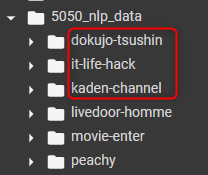


In [ ]:
# keyとvalue を辞書で設定。例えば "dokujo-tsushin"の記事は1番、'it-life-hack'の記事は2番、のように。
category = {
        'dokujo-tsushin': 1,
        'it-life-hack': 2,
        'kaden-channel': 3,
    }

# 出力結果が格納されるリストも作成します。
texts  = []
labels = []

辞書型で設定した記事内容とラベルを一括読込する独自関数を作成しました。







In [ ]:
# 上を踏まえた上での合間にprint文を挟んで更に分かりやすく。

def load_livedoor_news_corpus():
  for name, label in category.items():
    files = glob.glob(f"./5050_nlp_data/{name}/{name}*.txt")
    for file in files[:3]:
      print("file:",file)                                                # 確認表示用
      with open(file, "r", encoding="utf-8") as f:
        lines = f.read().splitlines() 
        print("Lines:",lines)                                            # 確認表示用
        text = "".join(lines[2:])
        print("text:",text)                                              # 確認表示用
        print("-----------------")
      texts.append(text)
      labels.append(label)

  return texts, labels

# texts, labels = load_livedoor_news_corpus()

In [ ]:
'''
どうやらシングルクォーテーション*3のコメントアウトは文字列用らしいぞ。他に多用して不具合が起きる可能性とかあるのかね？
独自関数の説明

def load_livedoor_news_corpus(): 
  for name, label in category.items():　　　　　　　　　　　　　　　　　　　　　　上記で設定したkeyとvalueを各々 nameとlabelに格納する。
    files = glob.glob("./5050_nlp_data/{name}/{name}*.txt".format(name=name))　　 5050_nlp_data内にあるディレクトリのname変数に格納されたディレクトリのtxtファイルを全てfilesという変数に格納する。(files = glob.glob("./5050_nlp_data/dokujo-tsushin/dokujo-tsushin*.txt")
    for file in files[:3]:                                                        今回は全摘出されたファイルパスの中から３つだけ指定します。
      with open(file, "r", encoding="utf-8") as f:　　　　　　　　　　　　　　　　with open タイプ r as f 
        lines = f.read().splitlines()                                             f(３つ)を読み込みます。文字列を改行で分割します。それをlinesに格納
        text = "".join(lines[2:])                                                 lineのリストの中のタイトルから先を抽出しています 0は格納場所 1はdatetime 
      texts.append(text)                                                          本文(text)をリストtexts に追加。
      labels.append(label)                                                        カテゴリ(kabel)をリストlabels に追加。

  return texts, labels                                                            出力結果は　変数 textsとlabelsに保存されます。

texts, labels = load_livedoor_news_corpus()                                       関数の呼び出し。関数の実行結果は texts　labels　に格納されるように準備します。

'''

'\nどうやらシングルクォーテーション*3のコメントアウトは文字列用らしいぞ。他に多用して不具合が起きる可能性とかあるのかね？\n独自関数の説明\n\ndef load_livedoor_news_corpus(): \n  for name, label in category.items():\u3000\u3000\u3000\u3000\u3000\u3000\u3000\u3000\u3000\u3000\u3000\u3000\u3000\u3000\u3000\u3000\u3000\u3000\u3000\u3000\u3000\u3000上記で設定したkeyとvalueを各々 nameとlabelに格納する。\n    files = glob.glob("./5050_nlp_data/{name}/{name}*.txt".format(name=name))\u3000\u3000 5050_nlp_data内にあるディレクトリのname変数に格納されたディレクトリのtxtファイルを全てfilesという変数に格納する。(files = glob.glob("./5050_nlp_data/dokujo-tsushin/dokujo-tsushin*.txt")\n    for file in files[:3]:                                                        今回は全摘出されたファイルパスの中から３つだけ指定します。\n      with open(file, "r", encoding="utf-8") as f:\u3000\u3000\u3000\u3000\u3000\u3000\u3000\u3000\u3000\u3000\u3000\u3000\u3000\u3000\u3000\u3000with open タイプ r as f \n        lines = f.read().splitlines()                                             f(３つ)を読み込みます。文字列を改行で分割します。それをlinesに格納\n        text = "".join(lines[2:])            

In [ ]:
# 上記の独自関数の返り値(returnのtextsとlabels)を左辺の変数に格納します。
texts, labels = load_livedoor_news_corpus()

# 結果の確認
print(texts)
print(len(texts))
print()
print(labels)

file: ./5050_nlp_data/dokujo-tsushin/dokujo-tsushin-5699705.txt
Lines: ['http://news.livedoor.com/article/detail/5699705/', '2011-07-11T12:30:00+0900', '悩ましき女友だちとの格差問題', '格差社会という言葉が新語・流行語大賞の上位にランクインしたのは2006年のころ。2008年には、女性たちの間のさまざまな「格差」に注目した『女女格差』（橘木俊詔 著/東洋経済新報社）という書籍も出版されている。女友だちとの間に格差が生まれやすいのは、就職や結婚によってお互いの生活レベルや価値観が変わるときだというから、独女世代は、まさにその渦中にあるといえる。', '', '大学卒業以来、夏になるとアイコさん（29歳・メーカー勤務）は、親友のエミさん（29歳・商社勤務）と旅行を楽しんできた。しかし、今年は、計画すらたっていない。アイコさんは2泊3日くらいで行ける国内旅行を考えていたのだが、エミさんは20代最後の記念にヨーロッパへ行きたいという。', '', '「実は、業績悪化でボーナスが半分以下になってしまったんです」とアイコさん。「とてもヨーロッパなんて行けません。でも、それだけではないんです。ここ数年、彼女と会う度に少しずつ感じていた違和感が、今度の旅行のことで、 価値観の違いではなく格差だと実感しました」と話してくれた。', '', '気楽な居酒屋が好きなアイコさんと、雑誌などに載っているレストランを好むエミさん。転職を視野に入れて簿記を習い始めたアイコさんと上司の勧めでゴルフを始めたエミさん。Tシャツなら3,000円前後で買いたいアイコさんと、Tシャツでもデザインと質の良いものなら1万円以上でも購入するエミさん…。', '', '「お給料の話はしませんが、彼女の話を聞いていると10万円近い差があるでしょう。 エミは『アイコと一緒に出かけるのが一番楽しい』と言ってくれますが、私が格差を感じちゃうんですよね」（アイコさん）', '', '学生時代は、あまり金銭的な差を感じなかった友人同士でも、就職先によってさまざまな違いが生まれてくる。仲が良ければ良いほど、元々の家庭環境や金銭感覚が近ければ近いほど、就職後に友だちとの間に生ま

### 取得記事の形態素解析。
取得した記事の<font color="red">形態素解析</font>を行います。

In [ ]:
# まずは先ほど取得した記事を確認してみましょう。

print(texts)
print(len(texts))
print()
print(labels)

['悩ましき女友だちとの格差問題格差社会という言葉が新語・流行語大賞の上位にランクインしたのは2006年のころ。2008年には、女性たちの間のさまざまな「格差」に注目した『女女格差』（橘木俊詔 著/東洋経済新報社）という書籍も出版されている。女友だちとの間に格差が生まれやすいのは、就職や結婚によってお互いの生活レベルや価値観が変わるときだというから、独女世代は、まさにその渦中にあるといえる。大学卒業以来、夏になるとアイコさん（29歳・メーカー勤務）は、親友のエミさん（29歳・商社勤務）と旅行を楽しんできた。しかし、今年は、計画すらたっていない。アイコさんは2泊3日くらいで行ける国内旅行を考えていたのだが、エミさんは20代最後の記念にヨーロッパへ行きたいという。「実は、業績悪化でボーナスが半分以下になってしまったんです」とアイコさん。「とてもヨーロッパなんて行けません。でも、それだけではないんです。ここ数年、彼女と会う度に少しずつ感じていた違和感が、今度の旅行のことで、 価値観の違いではなく格差だと実感しました」と話してくれた。気楽な居酒屋が好きなアイコさんと、雑誌などに載っているレストランを好むエミさん。転職を視野に入れて簿記を習い始めたアイコさんと上司の勧めでゴルフを始めたエミさん。Tシャツなら3,000円前後で買いたいアイコさんと、Tシャツでもデザインと質の良いものなら1万円以上でも購入するエミさん…。「お給料の話はしませんが、彼女の話を聞いていると10万円近い差があるでしょう。 エミは『アイコと一緒に出かけるのが一番楽しい』と言ってくれますが、私が格差を感じちゃうんですよね」（アイコさん）学生時代は、あまり金銭的な差を感じなかった友人同士でも、就職先によってさまざまな違いが生まれてくる。仲が良ければ良いほど、元々の家庭環境や金銭感覚が近ければ近いほど、就職後に友だちとの間に生まれる経済的な差は「苦痛」に感じる。それは、男性でも同じことだが、例えば、洋服の生地や化粧品の色艶など、細かいところまで気がつく女性たちは、男性よりも敏感に相手と自分の差を感じてしまうのだ。ライター仲間のミナミさんは「初めて本を出せることになった」と親友に話したところ、喜んでくれるどころか、彼女は「ミナミとは、なんか格差を感じるから嫌なの」と不機嫌になってしまったそうだ。その後、彼女からの

###### 脱線　ジェネレータオブジェクトとは

In [ ]:
t = Tokenizer()
tokens = t.tokenize(",".join(texts))                                    # 形態素解析 ここの部分が少し怪しい。 tokensは何者？自分の推測としては？
tokens

<generator object Tokenizer.__tokenize_stream at 0x7f76be21d6d0>

tokensの中身`<generator object Tokenizer.__tokenize_stream at 0x7f76dfb40650>`

- ジェネレーターオブジェクトで返されています。　　0x7f76d55236d0というメモリの場所に格納されています。

じぇんれーたオブジェクトは理解が難しく複雑です。今回はスキップで。[詳細はこちら](https://qiita.com/keitakurita/items/5a31b902db6adfa45a70)

###### 独自関数。 引数にpart ここには記事が格納されているtextsを格納する。　返り値はwordのリスト。

In [ ]:
# 基本的にリストも関数内で準備する事。そうしないとリスト内容が初期化されないので。

# 品詞を取り出し「名詞、動詞、形容詞、形容動詞」のリスト作成
def tokenize(part):
  word = []
  tokens = t.tokenize(",".join(part))
  # print(tokens)                                                          # 確認表示用
  # print("----------------------------")                                  # 確認表示用
  for token in tokens:
    part_of_speech = token.part_of_speech.split(",")[0]                  # 文章を区切っている。一つの長文ではなく、区切る事で使い勝手の良さが増す。
    if part_of_speech in ["名詞", "動詞", "形容詞", "形容動詞"]:
      word.append(token.surface)            
  return word

In [ ]:
t = Tokenizer() # 最初にTokenizerインスタンスを作成する

# 取得した大量の文章を 独自関数tokenize にかけている。⇒出力結果は　分かち書きされて ["名詞", "動詞", "形容詞", "形容動詞"] を抜き出したもの。
sentences = tokenize(texts)  # 抽出した9つの記事全てを分かち書きして["名詞", "動詞", "形容詞", "形容動詞"]を変数 sentences に入れました。


# print(sentences[:100])
print(len(sentences))

3950


In [ ]:
word

### Word2Vecの実装と確認

Word2Vecの引数の設定。：単語をベクトル化するツール。

- size ：ベクトルの次元数。
- min_count ：n回未満登場する単語を破棄。
- window ：この数の前後の単語を、関連性のある単語と見なして学習を行う。

In [ ]:
from gensim.models import word2vec

model = word2vec.Word2Vec([sentences], size=100, min_count=5, window=15)

# sentenceを訓練データとしたmodel は何者ですか？

これでmodelを作成する事が出来ました。

In [ ]:
print(model.most_similar(positive=["好き"]))

# ニュアンスだけど、訓練データのsentenceから学習したmodelに言わせてみると、　「好き」という単語と最も近い単語は「よう」。

[('よう', 0.9666067957878113), ('する', 0.9650087952613831), ('なる', 0.9639483690261841), ('300', 0.9624971151351929), ('し', 0.9621337056159973), ('-', 0.9618151187896729), ('できる', 0.9618022441864014), ('用', 0.9612510800361633), ('C', 0.9601595401763916), ('3', 0.9597204923629761)]


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  """Entry point for launching an IPython kernel.


この単語間の似ているっているのは成果物の一つ手であり他の要素に色々流用できる。

単語を特徴量に⇒意味合いに。
単語の数値化⇒計算式に使える。